<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/ExhaustivE_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

car_df = pd.read_csv ("/content/drive/MyDrive/datamining/ToyotaCorolla.csv")
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [6]:
car_df.shape
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [11]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 13.3 MB/s eta 0:00:00


In [14]:
car_df = car_df.iloc[0:1000]
predictors = ['Age_08_04', 'KM','Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
outcome ='Price'

#Pratitaion the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

X = car_df[predictors]
X = pd.get_dummies(X, drop_first = True)
y = car_df[outcome]


In [22]:
X.shape

(1000, 11)

In [21]:
X_train, X_test, y_train, y_test = train_test_split (X,y , test_size = 0.4, random_state = 1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Print Coefficient
print(pd.DataFrame({'Predictors':X.columns, 'Coefficient':regressor.coef_}))

#print performance measure
regressionSummary(y_train, regressor.predict(X_train))


          Predictors  Coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [23]:
print(regressor.coef_)

[-1.40748761e+02 -1.78401025e-02  3.61034192e+01  8.42818300e+01
  4.16781954e+02  1.77365959e-02 -5.06578632e+01  1.36253254e+01
  1.30387115e+01  1.06646468e+03  2.31024954e+03]


In [24]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
score= r2_score(y_test,y_pred)
print(score*100)

88.17136165654674


In [27]:
result = pd.DataFrame({'Predicted': y_pred, 'Acutal':y_test,'Residual':y_test - y_pred})
result.head(20)

,Predicted,Acutal,Residual
507,10607.333940,11500,892.666060
818,9272.705792,8950,-322.705792
452,10617.947808,11450,832.052192
368,13600.396275,11450,-2150.396275
242,12396.694660,11950,-446.694660
929,9496.498212,9995,498.501788
262,12480.063217,13500,1019.936783
810,8834.146068,7950,-884.146068
318,12183.361282,9900,-2283.361282
49,19206.965683,21950,2743.034317


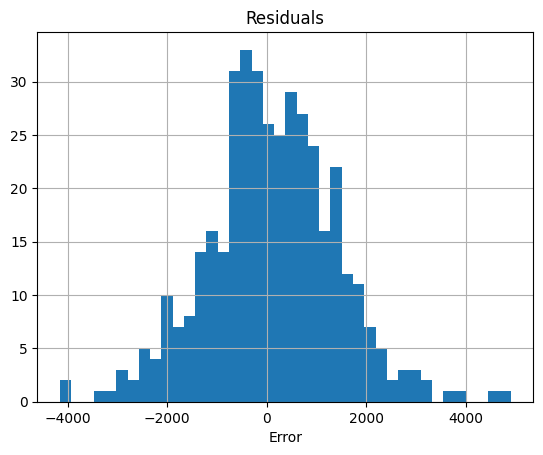

In [30]:
import matplotlib.pyplot as plt
all_residuals = y_test - y_pred
pd.DataFrame({'Residuals':all_residuals}).hist(bins=40)
plt.xlabel('Error')
plt.show()

## Exhaustive Search


In [36]:
from dmba import exhaustive_search, adjusted_r2_score, AIC_score, BIC_score


def train_model(variables):
  model = LinearRegression()
  model.fit(X_train[list(variables)], y_train)
  return model

def score_model(model, variables):
  y_pred = model.predict(X_train[list(variables)])

  return -adjusted_r2_score(y_train, y_pred, model)

all_variables = X_train.columns
results = exhaustive_search(all_variables, train_model, score_model)

data = []

for result in results:
  model = result['model']
  variables = list(result['variables'])
  AIC= AIC_score(y_train, model.predict(X_train[variables]),model)
  d = {'n': result['n'], 'r2adj': -result['score'],'AIC':AIC}
  d.update({var:var in result['variables'] for var in all_variables})
  data.append(d)
df= pd.DataFrame(data,columns =['n','r2adj','AIC']+ sorted(all_variables))

In [37]:
df

,n,r2adj,AIC,Age_08_04,Automatic,CC,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,KM,Met_Color,Quarterly_Tax,Weight
0,1,0.767901,10689.712094,True,False,False,False,False,False,False,False,False,False,False
1,2,0.801160,10597.910645,True,False,False,False,False,False,True,False,False,False,False
2,3,0.829659,10506.084235,True,False,False,False,False,False,True,False,False,False,True
3,4,0.846357,10445.174820,True,False,False,False,False,False,True,True,False,False,True
4,5,0.849044,10435.578836,True,False,False,False,False,False,True,True,False,True,True
5,6,0.853172,10419.932278,True,False,False,False,False,True,True,True,False,True,True
6,7,0.853860,10418.104025,True,False,False,False,True,True,True,True,False,True,True
7,8,0.854297,10417.290103,True,True,False,False,True,True,True,True,False,True,True
8,9,0.854172,10418.789079,True,True,False,True,True,True,True,True,False,True,True
9,10,0.854036,10420.330800,True,True,False,True,True,True,True,True,True,True,True
